# Anwendung der gelernten Methoden auf den LEGO-Datensatz

In [35]:
import numpy as np
import pandas as pd
import matplotlib as plot

## Einlesen und erste Inspektion

Lesen Sie den Datensatz `LEGO.csv` ein und verschaffen Sie sich einen ersten Überblick über die Daten.
Der Datensatz besteht aus mehreren Webscrapes über die LEGO-Webseite. Wann war das und wie viele Sets wurden jeweils erfasst?

Im weiteren Verlauf beschränken wir uns auf den neuesten Abzug und betrachten diesen Teildatensatz. Da wir diesen nicht nur lesend nutzen werrden sondern darin auch neue Spalten anlegen werden, eignet sich eine echte Kopie der Daten. (Per Default werden die Daten bei Zeilenselektion nicht kopiert.)

In [16]:
LEGO_all = pd.read_csv("LEGO.csv")
LEGO = LEGO_all[LEGO_all["date"]== LEGO_all["date"].max()].copy()
LEGO.head()
LEGO.value_counts("date", sort = False)

date
2023-09-21    1054
Name: count, dtype: int64

In [8]:
LEGO = legolist[legolist["date"] == "2023-09-21"].copy()
print(len(LEGO))
LEGO.head(3)

1054


,name,theme,product_code,ageRange,pieceCount,price,minifigureCount,buildHeight,buildWidth,buildDepth,url,date
0,Burg Himeji,Architecture,21060,18+,2125.0,159.99,NaN,NaN,NaN,NaN,/de-de/product/himeji-castle-21060,2023-09-21
1,New York City,Architecture,21028,12+,598.0,49.99,NaN,NaN,NaN,NaN,/de-de/product/new-york-city-21028,2023-09-21
2,Taj Mahal,Architecture,21056,18+,2022.0,119.99,NaN,20.0,23.0,23.0,/de-de/product/taj-mahal-21056,2023-09-21


## Aufgabe 1: Extreme Modelle

- Wie viel kostes das teuerste aktuelle LEGO-Set?
- Welches Set am meisten Teile?
- Welches hat den längsten Namen?

In [ ]:
LEGO.price.max() #849.99

LEGO.sort_values("pieceCount", ascending=False).iloc[0]

LEGO ["len_name"] = LEGO["name"].str.len()
LEGO.sort_values("len_name", ascending = False).head(1)
##nur ein Name
LEGO[LEGO["len_name"] == LEGO["len_name"].max()]

,name,theme,product_code,ageRange,pieceCount,price,minifigureCount,buildHeight,buildWidth,buildDepth,url,date,len_name
881,Mercedes-AMG F1 W12 E Performance & Mercedes-A...,Speed Champions,76909,9+,564.0,44.99,NaN,NaN,NaN,NaN,/de-de/product/tbd-speed-champions-ip4-2022-76909,2023-09-21,60


## Aufgabe 2: Sets pro Thema

Ziel: Wir wollen pro Themengruppe die Anzahl der jeweiligen Sets bestimmen und die Themen gemäß dieser Anzahl ordnen. Anschließend sollen die Themengrößen auch als Balkendiagramm visualisiert werden.

In [ ]:
3+3

In [ ]:
#frequencies = LEGO.groupby("theme").size().sort_values(ascending = False)
#frequencies.plot.barh()


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

## Aufgabe 3: Für welche Themen ist der Preis pro Einzelbauteil besonders hoch?

Bestimmen Sie für jedes Set den Preis pro Einzelteil und berechnen Sie für jede Themengruppe den Mittewert daraus daraus. Visualisieren Sie anschließend Ihr Ergebnis als Balkendiagramm.

In [25]:
#zum inspizieren
inspect =LEGO[ LEGO["theme"] == "Creator 3-in-1-Sets"] [["name", "pieceCount", "price", "price_per_piece"]]
inspect

,name,pieceCount,price,price_per_piece
173,Exotischer pinkfarbener Papagei,253.0,24.99,0.098775
174,Weltraum-Achterbahn,874.0,104.99,0.120126
175,Vogelhäuschen,476.0,29.99,0.063004
176,Hauptstraße,1459.0,139.99,0.095949
177,Exotischer Papagei,253.0,24.99,0.098775
178,Niedliche Hunde,475.0,29.99,0.063137
179,Magisches Einhorn,145.0,9.99,0.068897
180,Bewohner der Tiefsee,230.0,14.99,0.065174
181,Dinosaurier,174.0,14.99,0.086149
182,Mittelalterliche Burg,1426.0,99.99,0.070119


<Axes: ylabel='theme'>

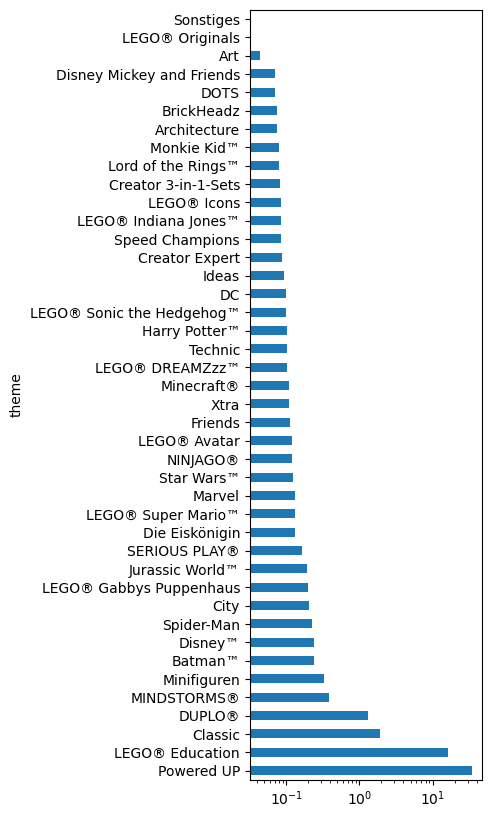

In [41]:
LEGO["price"].sum() #Preis gesammt
##Preis pro einzelteil
##Gesammtpreis durch anzahl der Teile
price_per_piece = LEGO["price"].mean()/ LEGO["pieceCount"].mean()
LEGO.head()

#Offiziele Lösung
LEGO["price_per_piece"] = LEGO["price"]/ LEGO["pieceCount"]
LEGO.loc[LEGO["price_per_piece"] == np.inf, "price_per_piece"] = np.nan
LEGO.head()
##Eine Möglichkeit lange Befehlsketten übersichtlich zu machen
(LEGO.groupby("theme")["price_per_piece"]
 .mean()
 .sort_values(ascending = False)
 .plot.barh(figsize=(3,10),logx=True))
